In [1]:
import numpy as np
import sys
import os
from pathlib import Path
from src import redcells


s2p_green = Path(r"C:\Users\labadmin\Desktop\twochan_test\2024_10_15\3\suite2p")
s2p_red = Path(r"C:\Users\labadmin\Desktop\twochan_test\2")
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
s2p_green, s2p_red = redcells.path_two_channels()


Selected Directory: X:/DATA/VG11/2024_10_15/2
Selected Directory: Z:/data/PROC/VG11/2024_10_15/4/suite2p


In [3]:
ops = redcells.tiffs_to_binary(s2p_red)


NOTE: nplanes 2 nrois 10 => ops['nplanes'] = 20
tif
** Found 1 tifs - converting to binary **


In [4]:
ops_paths, ops_paths_green, nplanes = redcells.align_to_green(ops, s2p_green)

X:\DATA\VG11\2024_10_15\2\suite2p\plane0\ops.npy
>>>> registering PLANE 0
X:\DATA\VG11\2024_10_15\2\suite2p\plane0\ops.npy X:\DATA\VG11\2024_10_15\2\suite2p\plane0\data.bin
registering two channels
Registered 381/381 in 10.44s
Second channel, Registered 381/381 in 3.03s


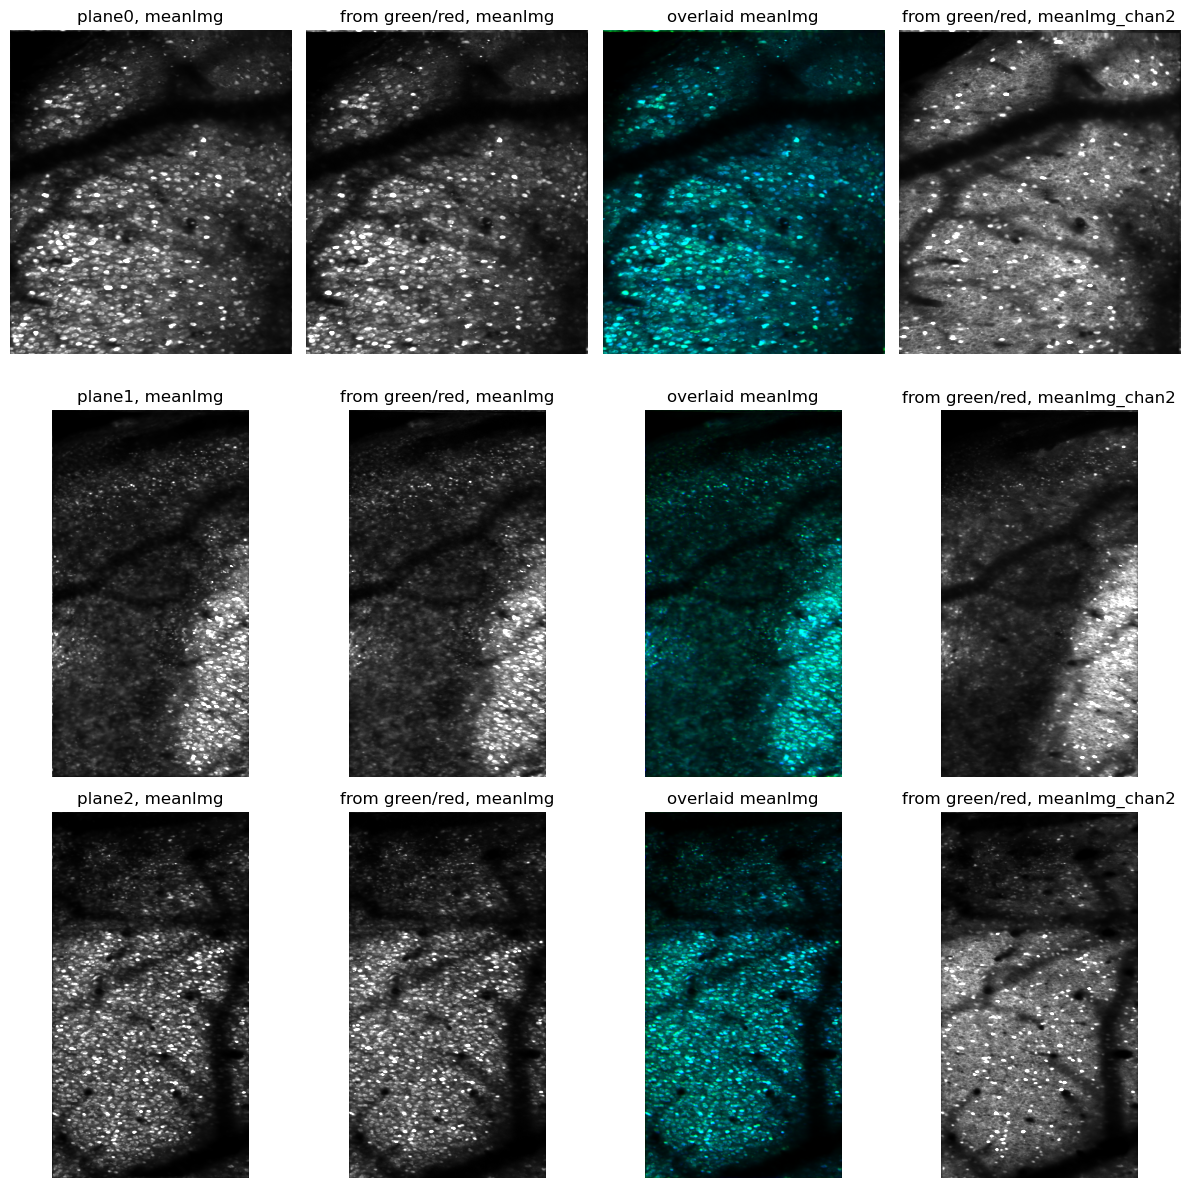

In [5]:
redcells.check_alignment(ops_paths, ops_paths_green, 3)

Text(0.5, 1.0, 'from green/red, meanImg_chan2')

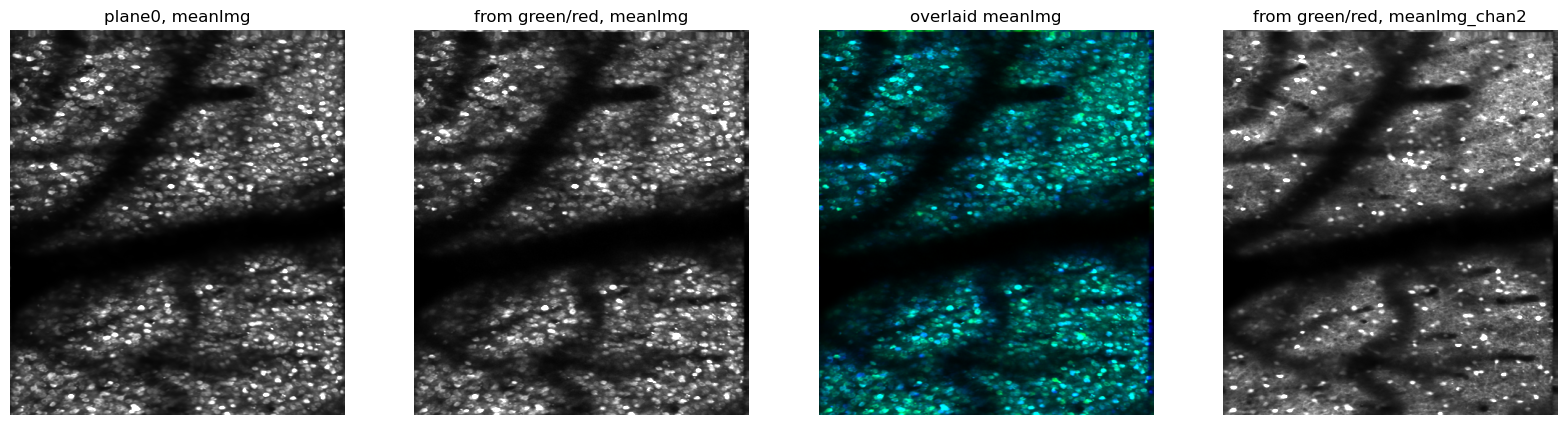

In [16]:
from cellpose.transforms import normalize99
import matplotlib.pyplot as plt
ipl = 0
plt.figure(figsize=(20, 5))
ops = np.load(ops_paths[ipl], allow_pickle=True).item()
ops_green = np.load(ops_paths_green[ipl], allow_pickle=True).item()
plt.subplot(1, 4, 1 + ipl*4)
plt.imshow(normalize99(ops_green["meanImg"]), vmin=0, vmax=1, cmap="gray")
plt.title(f"plane{ipl}, meanImg")
plt.axis("off")

plt.subplot(1, 4, 2 + ipl*4)
plt.imshow(normalize99(ops["meanImg"]), vmin=0, vmax=1, cmap="gray")
plt.axis("off")
plt.title(f"from green/red, meanImg")

rgb = np.zeros((*ops["meanImg"].shape, 3))
rgb[:,:,1] = np.clip(normalize99(ops["meanImg"]), 0, 1)
rgb[:,:,2] = np.clip(normalize99(ops_green["meanImg"]), 0, 1)
plt.subplot(1, 4, 3 + ipl*4)
plt.imshow(rgb)
plt.axis("off")
plt.title(f"overlaid meanImg")

plt.subplot(1, 4, 4 + ipl*4)
plt.imshow(normalize99(ops["meanImg_chan2"]), vmin=0, vmax=1, cmap="gray")
plt.axis("off")
plt.title(f"from green/red, meanImg_chan2")

In [6]:
redcells.overlap_with_green(s2p_green, ops_paths, ops_paths_green, nplanes)

X:\DATA\VG11\2024_10_15\2\suite2p\plane0\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel


c:\Users\labadmin\anaconda3\envs\categoryneural\lib\site-packages\cellpose\resnet_torch.py:298: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filenam

>>>> 243 masks detected, median diameter = 10.76 
X:\DATA\VG11\2024_10_15\2\suite2p\plane1\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel


c:\Users\labadmin\anaconda3\envs\categoryneural\lib\site-packages\cellpose\resnet_torch.py:298: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filenam

>>>> 273 masks detected, median diameter = 12.15 
X:\DATA\VG11\2024_10_15\2\suite2p\plane2\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel
>>>> 303 masks detected, median diameter = 11.62 
X:\DATA\VG11\2024_10_15\2\suite2p\plane3\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel
>>>> 212 masks detected, median diameter = 11.31 
X:\DATA\VG11\2024_10_15\2\suite2p\plane4\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel
>>>> 423 masks detected, median diameter = 10.28 
X:\DATA\VG11\2024_10_15\2\suite2p\plane5\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel
>>>> 343 masks detected, median diameter = 10.34 
X:\DATA\VG11\2024_10_15\2\suite2p\plane6\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel


c:\Users\labadmin\anaconda3\envs\categoryneural\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\labadmin\anaconda3\envs\categoryneural\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


>>>> 141 masks detected, median diameter = 12.87 
X:\DATA\VG11\2024_10_15\2\suite2p\plane7\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel
>>>> 299 masks detected, median diameter = 11.40 
X:\DATA\VG11\2024_10_15\2\suite2p\plane8\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel
>>>> 351 masks detected, median diameter = 12.31 
X:\DATA\VG11\2024_10_15\2\suite2p\plane9\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel
>>>> 373 masks detected, median diameter = 11.67 
X:\DATA\VG11\2024_10_15\2\suite2p\plane10\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel
>>>> 432 masks detected, median diameter = 10.28 
X:\DATA\VG11\2024_10_15\2\suite2p\plane11\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel
>>>> 264 masks detected, median diameter = 11.99 
X:\DATA\VG11\2024_10_15\2\suite2p\plane12\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel
>>>> 271 masks detected, median diameter = 12.36 
X:\DATA\VG11\2024_10_15\2\suite2p\p

In [7]:
s2p_green

WindowsPath('C:/Users/labadmin/Desktop/twochan_test/2024_10_15/3/suite2p')

In [ ]:
root = s2p_green
isredcell = np.zeros((0,2))
ops = np.load(
    os.path.join(root, "plane0", "ops.npy"), allow_pickle=True
).item()
for n in range(ops["nplanes"]):
    redcell0 = np.load(os.path.join(root, "plane%d" % n, "redcell.npy"), allow_pickle=True
)
    isredcell = np.concatenate((isredcell, redcell0), axis=0)
print(isredcell.shape)


(2039, 2)
(4260, 2)
(3604, 2)
(1660, 2)
(242, 2)
(85, 2)
(1697, 2)
(2204, 2)
(2869, 2)
(1721, 2)
(2130, 2)
(4336, 2)
(3708, 2)
(1514, 2)
(177, 2)
(66, 2)
(1781, 2)
(2382, 2)
(2754, 2)
(1691, 2)
(40920, 2)


In [19]:
ops["nplanes"]

20

In [18]:
isredcell

array([[0.        , 0.24705882],
       [1.        , 0.47552449],
       [0.        , 0.10964912],
       ...,
       [0.        , 0.        ],
       [0.        , 0.        ],
       [1.        , 0.38709676]])

In [ ]:
from suite2p import default_ops
from suite2p.io import tiff
import imp
from natsort import natsorted
imp.reload(tiff)
import json

save_folder = os.path.join(s2p_green)
plane_folders = natsorted(
    [
        f.path
        for f in os.scandir(save_folder)
        if f.is_dir() and f.name[:5] == "plane"
    ]
)
ops_paths = [os.path.join(f, "ops.npy") for f in plane_folders]
ops_greens = [np.load(f, allow_pickle=True).item() for f in ops_paths]
dx = [ops["dx"] for ops in ops_greens[:len(ops_greens)//2]]
dy = [ops["dy"] for ops in ops_greens[:len(ops_greens)//2]]
lines = [ops["lines"] for ops in ops_greens[:len(ops_greens)//2]]

### convert red/green tiffs to binary files
ops_green = np.load(os.path.join(s2p_green, "plane0\ops.npy"), allow_pickle=True).item()
ops = default_ops()
ops["data_path"] = [s2p_red]#[root / s2p_red]
ops["nchannels"] = 2
ops["save_path0"] = str(ops["data_path"][0])
ops["mesoscan"] = True
#ops["lines"] = lines
#ops["dx"] = dx
#ops["dy"] = dy
ops["nplanes"] = 2
ops["functional_chan"] = 2
ops["nrois"] = len(lines) // 2

ops = tiff.mesoscan_to_binary(ops)

NOTE: nplanes 2 nrois 10 => ops['nplanes'] = 20
tif
** Found 1 tifs - converting to binary **
2


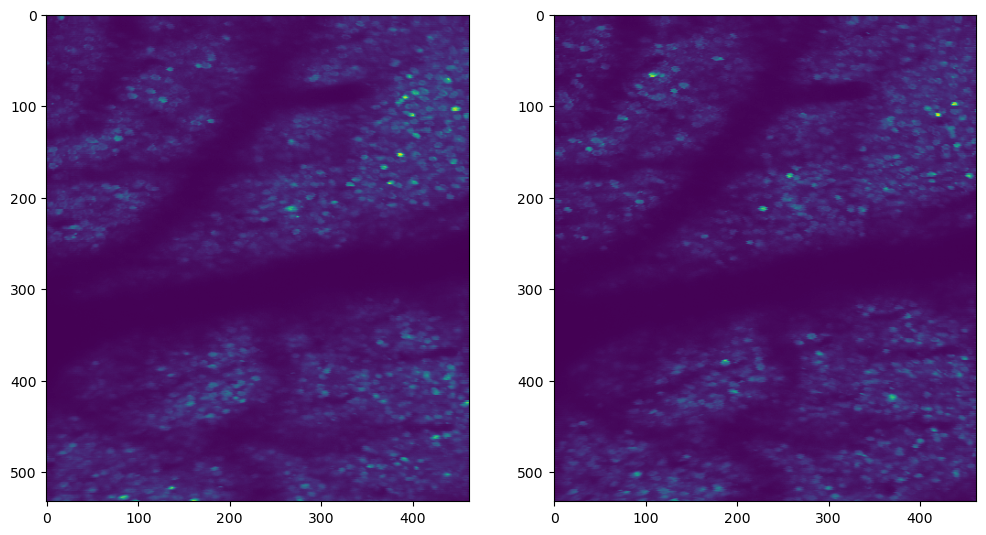

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(ops["meanImg_chan2"])
plt.subplot(1,2,2)
plt.imshow(ops["meanImg"])


In [10]:
import tifffile

tif = tifffile.imread(r"C:\Users\labadmin\Desktop\twochan_test\2\VG15_2024_10_15_2_00001_00001.tif")


<AxesSubplot:>

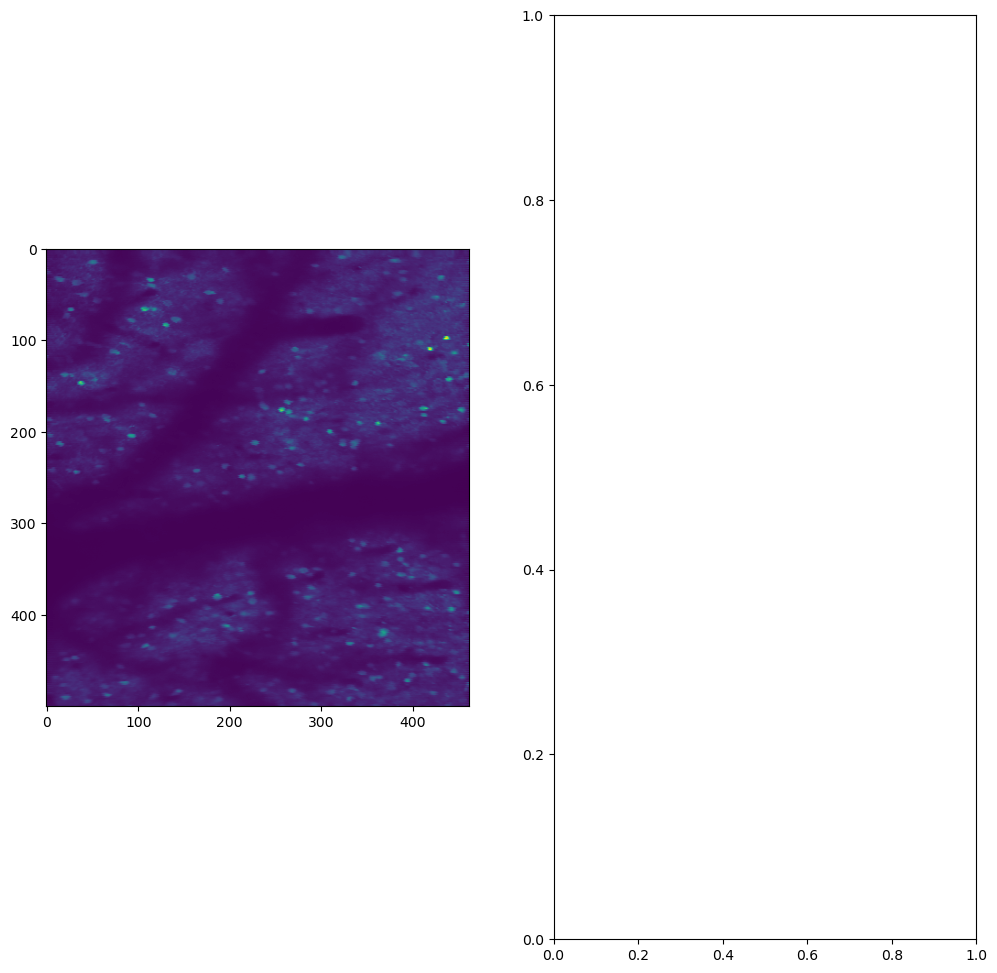

In [14]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(tif[::2, :500].mean(axis=0))
plt.subplot(1,2,2)


In [10]:
from suite2p.registration import register
import contextlib 
from suite2p import io
from natsort import natsorted 
import imp
imp.reload(register)

### align red/green recording to green recording

# get plane folders
ops["save_folder"] = "suite2p"
save_folder = os.path.join(s2p_red, "suite2p")
plane_folders = natsorted(
    [
        f.path
        for f in os.scandir(save_folder)
        if f.is_dir() and f.name[:5] == "plane"
    ]
)
ops_paths = [os.path.join(f, "ops.npy") for f in plane_folders]
nplanes = len(ops_paths)

# get reference images from long green recording
ops_paths_green = [str(s2p_green / f"plane{ipl}" / "ops.npy") 
                   for ipl in range(nplanes)]
refImgs = [np.load(ops_path, allow_pickle=True).item()["meanImg"] 
           for ops_path in ops_paths_green]


In [14]:
ops["nchannels"]

2

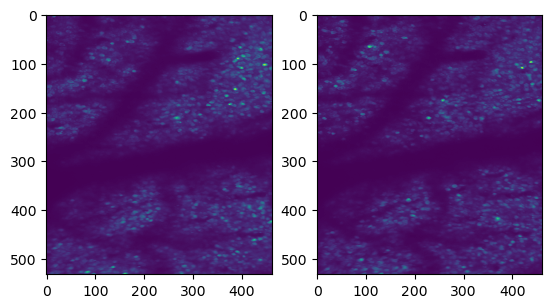

In [13]:
ops = np.load(ops_paths[0], allow_pickle=True).item()
plt.subplot(1,2,1)
plt.imshow(ops["meanImg_chan2"])
plt.subplot(1,2,2)
plt.imshow(ops["meanImg"])


In [ ]:
nplanes #this should be 20 isnt?

1

In [9]:
refImgs[0].shape

(532, 462)

In [4]:

# loop over planes
align_by_chan2 = False
for ipl, ops_path in enumerate(ops_paths[:1]):
    print(ops_path)
    if ipl in ops["ignore_flyback"]:
        print(">>>> skipping flyback PLANE", ipl)
        continue
    else:
        print(">>>> registering PLANE", ipl)
    ops = np.load(ops_path, allow_pickle=True).item()
    # get binary file paths
    raw = ops.get("keep_movie_raw") and "raw_file" in ops and os.path.isfile(
        ops["raw_file"])
    reg_file = ops["reg_file"]
    raw_file = ops.get("raw_file", 0) if raw else reg_file
    # get number of frames in binary file to use to initialize files if needed
    if ops["nchannels"] > 1:
        reg_file_chan2 = ops["reg_file_chan2"]
        raw_file_chan2 = ops.get("raw_file_chan2", 0) if raw else reg_file_chan2
    else:
        reg_file_chan2 = reg_file
        raw_file_chan2 = reg_file

    # shape of binary files
    n_frames, Ly, Lx = ops["nframes"], ops["Ly"], ops["Lx"]

    null = contextlib.nullcontext()
    twoc = ops["nchannels"] > 1

    with io.BinaryFile(Ly=Ly, Lx=Lx, filename=raw_file, n_frames=n_frames) \
        if raw else null as f_raw, \
        io.BinaryFile(Ly=Ly, Lx=Lx, filename=reg_file, n_frames=n_frames) as f_reg, \
        io.BinaryFile(Ly=Ly, Lx=Lx, filename=raw_file_chan2, n_frames=n_frames) \
        if raw and twoc else null as f_raw_chan2,\
        io.BinaryFile(Ly=Ly, Lx=Lx, filename=reg_file_chan2, n_frames=n_frames) \
        if twoc else null as f_reg_chan2:
            f_alt_in, f_align_out, f_alt_out = None, None, None
            print(ops["ops_path"], f_reg.filename)
            registration_outputs = register.registration_wrapper(
                f_reg, f_raw=f_raw, f_reg_chan2=f_reg_chan2, f_raw_chan2=f_raw_chan2,
                refImg=refImgs[ipl], align_by_chan2=align_by_chan2, ops=ops)

            ops = register.save_registration_outputs_to_ops(registration_outputs, ops)
            
            meanImgE = register.compute_enhanced_mean_image(
            ops["meanImg"].astype(np.float32), ops)
            ops["meanImgE"] = meanImgE
    #np.save(ops["ops_path"], ops)




C:\Users\labadmin\Desktop\twochan_test\2\suite2p\plane0\ops.npy
>>>> registering PLANE 0
C:\Users\labadmin\Desktop\twochan_test\2\suite2p\plane0\ops.npy C:\Users\labadmin\Desktop\twochan_test\2\suite2p\plane0\data.bin
registering two channels
Registered 268/268 in 6.12s
Second channel, Registered 268/268 in 0.83s


In [5]:
# shape of binary files
n_frames, Ly, Lx = ops["nframes"], ops["Ly"], ops["Lx"]
n_frames, Ly, Lx 

(268, 532, 462)

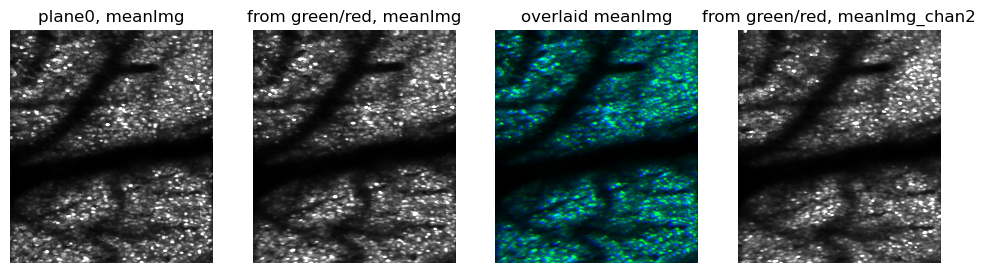

In [9]:
### check alignment
import matplotlib.pyplot as plt
from cellpose.transforms import normalize99

fig = plt.figure(figsize=(12,12))

for ipl in range(1):#nplanes):
    ops = np.load(ops_paths[ipl], allow_pickle=True).item()
    ops_green = np.load(ops_paths_green[ipl], allow_pickle=True).item()
    plt.subplot(1, 4, 1 + ipl*4)
    plt.imshow(normalize99(ops_green["meanImg"]), vmin=0, vmax=1, cmap="gray")
    plt.title(f"plane{ipl}, meanImg")
    plt.axis("off")
    
    plt.subplot(1, 4, 2 + ipl*4)
    plt.imshow(normalize99(ops["meanImg"]), vmin=0, vmax=1, cmap="gray")
    plt.axis("off")
    plt.title(f"from green/red, meanImg")
    
    rgb = np.zeros((*ops["meanImg"].shape, 3))
    rgb[:,:,1] = np.clip(normalize99(ops["meanImg"]), 0, 1)
    rgb[:,:,2] = np.clip(normalize99(ops_green["meanImg"]), 0, 1)
    plt.subplot(1, 4, 3 + ipl*4)
    plt.imshow(rgb)
    plt.axis("off")
    plt.title(f"overlaid meanImg")
    
    plt.subplot(1, 4, 4 + ipl*4)
    plt.imshow(normalize99(ops["meanImg_chan2"]), vmin=0, vmax=1, cmap="gray")
    plt.axis("off")
    plt.title(f"from green/red, meanImg_chan2")
#plt.tight_layout()


In [6]:
### get red channel overlap with green

from suite2p.detection import chan2detect, anatomical
imp.reload(anatomical)
imp.reload(chan2detect)

stat_paths_green = [str(s2p_green / f"plane{ipl}" / "stat.npy") 
                   for ipl in range(nplanes)]
redcell_paths_green = [str(s2p_green / f"plane{ipl}" / "redcell.npy") 
                   for ipl in range(nplanes)]

for ipl, ops_path in enumerate(ops_paths):
    print(ops_path)
    ops = np.load(ops_path, allow_pickle=True).item()
    stat = np.load(stat_paths_green[ipl], allow_pickle=True)

    ops, redstats = chan2detect.detect(ops, stat)

    np.save(ops_path, ops)
    
    opsg = np.load(ops_paths_green[ipl], allow_pickle=True).item()
    opsg["meanImg_chan2"] = ops["meanImg_chan2"]
    opsg["meanImg_chan2_corrected"] = ops["meanImg_chan2_corrected"]
    opsg["nchannels"] = 2

    np.save(ops_paths_green[ipl], opsg)
    np.save(redcell_paths_green[ipl], redstats)


Y:\QQZ\raw_DATA\VG5\2024_09_09\2\suite2p\plane0\ops.npy
>>>> CELLPOSE estimating masks in anatomical channel
ERROR importing or running cellpose, continuing without anatomical estimates


In [7]:
### save new combined ops and redcell
from suite2p.io.save import combined

combined(str(s2p_green));


appended plane 0 to combined view
